In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/imdb-spoiler-dataset/IMDB_movie_details.json
/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Loading the IMDb spoiler dataset 
df = pd.read_json("/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json", lines=True)
df = df.head(10000)  #
labels = df.is_spoiler.values
sentences = df.review_text.values



In [4]:
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.3, random_state=42
)


In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)



In [6]:
# Decision Tree Classifier with max depth 12
classifier = DecisionTreeClassifier(max_depth=12)
classifier.fit(train_vectors, train_labels)



DecisionTreeClassifier(max_depth=12)

In [7]:
# Predictions
predictions = classifier.predict(test_vectors)



In [8]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))



Test Accuracy: 70.87%
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.86      0.80      2069
        True       0.55      0.36      0.44       931

    accuracy                           0.71      3000
   macro avg       0.65      0.61      0.62      3000
weighted avg       0.69      0.71      0.69      3000



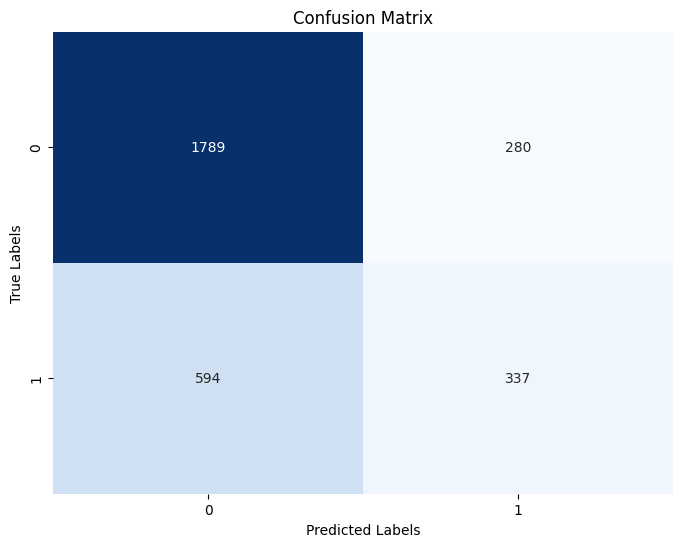

In [9]:
# Plot confusion matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

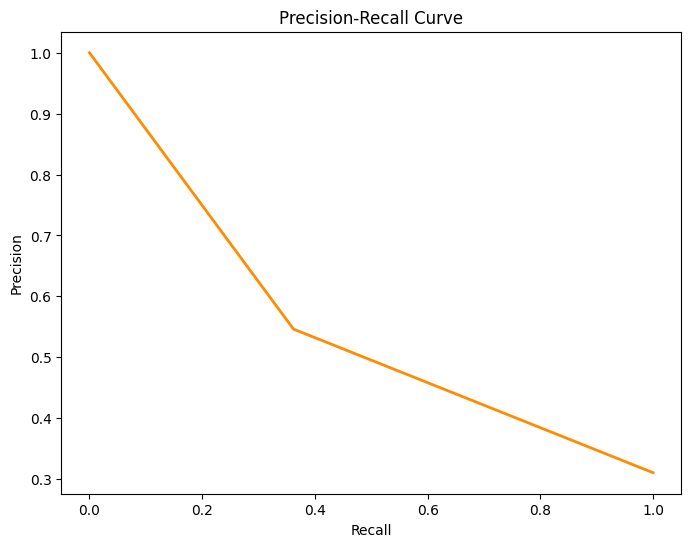

In [10]:
precision, recall, _ = precision_recall_curve(test_labels, predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


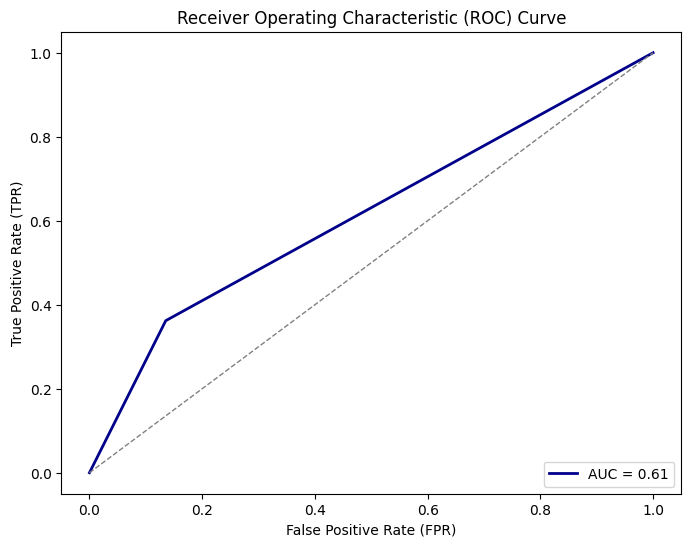

In [11]:
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()